 The following are the ages of 30 customers who ordered an EV scooter from Zen Automotives.ee.

     Ages : 42 44 62 35 20 30 56 20 23 41 55 22 31 27 66 21 18 24 42 25 32 50 31 26 36 39 40 18 36 22

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

Q1. Compute the mean, median and the mode of the data.

In [2]:
dict1 = {"Ages" : [42, 44, 62, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 66, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36, 22]}

In [3]:
df_ages = pd.DataFrame(dict1)
df_ages.head()

,Ages
0,42
1,44
2,62
3,35
4,20


In [4]:
mean = df_ages["Ages"].mean()
median = df_ages["Ages"].median()
mode = df_ages["Ages"].mode()

In [5]:
print("Mean of the data is :", mean)
print("Median of the data is :", median)
print("Mode of the data is :", mode)

Mean of the data is : 34.46666666666667
Median of the data is : 31.5
Mode of the data is : 0    18
1    20
2    22
3    31
4    36
5    42
Name: Ages, dtype: int64


Q2. Compute the range , variance and standard deviation of customer ages?

In [6]:
print("Range of the ages is from",df_ages["Ages"].min(), "to", df_ages["Ages"].max())

Range of the ages is from 18 to 66


In [7]:
variance = df_ages["Ages"].var()
std_deviation = df_ages["Ages"].std()

In [8]:
print("The variance of the data is", variance)

The variance of the data is 177.36091954022984


In [9]:
print("The standard deviation of the data is", std_deviation)

The standard deviation of the data is 13.317691974971858


 Q3. Find the mean deviation for the data . The mean deviation is defined as below.

In [10]:
df_ages.head()

,Ages
0,42
1,44
2,62
3,35
4,20


In [11]:
xbar = df_ages["Ages"].mean()
xbar

34.46666666666667

In [12]:
sum(abs(df_ages["Ages"] - xbar))

322.9333333333333

In [13]:
mean_deviation = sum(abs(df_ages["Ages"] - xbar))/len(df_ages["Ages"])
mean_deviation

10.764444444444443

In [14]:
print("The mean deviation of the data is :", mean_deviation)

The mean deviation of the data is : 10.764444444444443


Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data.

In [15]:
xbar

34.46666666666667

In [16]:
median

31.5

In [17]:
std_deviation

13.317691974971858

In [18]:
pearson_coe = (3 * (xbar - median))/std_deviation

In [19]:
print("Pearson coefficient of skewness of the above data is :", pearson_coe)

Pearson coefficient of skewness of the above data is : 0.668283965173989


Since the coefficient is positive, we can say that data is positively skewed.

Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [20]:
ll_2std = mean - 2 * std_deviation
ul_2std = mean + 2 * std_deviation

In [21]:
print(ll_2std, ul_2std)

7.831282716722953 61.102050616610384


In [22]:
df_ages[~((df_ages["Ages"] < ll_2std) | (df_ages["Ages"] > ul_2std))].shape[0]

28

Chebyshev's Theorem is stated as follows:

"For any continuous or discrete dataset, regardless of its shape, at least (1 - 1/k^2) of the data falls within k standard deviations from the mean, where k is any positive constant greater than 1."

In other words, for any value of k greater than 1, at least (1 - 1/k^2) of the data must fall within k standard deviations from the mean. This theorem provides a worst-case scenario estimate of the proportion of data within a given range.

In [23]:
k = 2
Chebyshev_Theorem = (1 - (1/k**2))*100
Chebyshev_Theorem

75.0

In [24]:
ages_no = df_ages[~((df_ages["Ages"] < ll_2std) | (df_ages["Ages"] > ul_2std))].shape[0]
ages_no

28

In [25]:
total = df_ages["Ages"].shape[0]
total

30

In [26]:
percent_values = (ages_no/total) * 100
percent_values

93.33333333333333

The percentage of values is 93% and is greater than 75% and hence it follows Chebyshev_Theorem.

Q6. Find the three quartiles and the interquartile range (IQR).

In [27]:
q1 = df_ages["Ages"].quantile(0.25)
q2 = df_ages["Ages"].quantile(0.5)
q3 = df_ages["Ages"].quantile(0.75)

In [28]:
print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)

Q1 : 23.25
Q2 : 31.5
Q3 : 41.75


In [29]:
iqr = q3 - q1

In [30]:
print("Inter Quartile range is :", iqr)

Inter Quartile range is : 18.5


Q7. Are there any outliers in the data set ?

In [31]:
df_ages["Ages"].skew()

0.7957157870367397

In [32]:
ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr

In [33]:
print(ll, ul)

-4.5 69.5


In [34]:
df_ages[(df_ages["Ages"] < ll) | (df_ages["Ages"] > ul)].shape[0]

0

There are no outliers in the dataset.

Q8. Draw a boxplot of the dataset to confirm about outlier information.

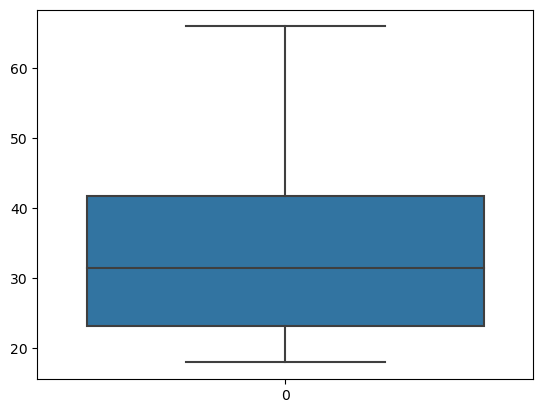

In [35]:
sns.boxplot(df_ages["Ages"])
plt.show()

From the box plot also, we can infer that there are no otliers.

Q9. Find the percentile rank of the datapoint 50.

In [36]:
sort_ages = pd.DataFrame(df_ages[df_ages["Ages"] <= 50])
percentile_rank = (sort_ages.shape[0]/df_ages.shape[0]) * 100

In [37]:
print("The percentile rank of data point 50 is :", percentile_rank)

The percentile rank of data point 50 is : 86.66666666666667


Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

In [38]:
print("The probability that a person ordering an EV scooter is above 50 years old is :", 100 - percentile_rank)

The probability that a person ordering an EV scooter is above 50 years old is : 13.333333333333329


Q11. Create a frequency distribution for the data and visualize it appropriately

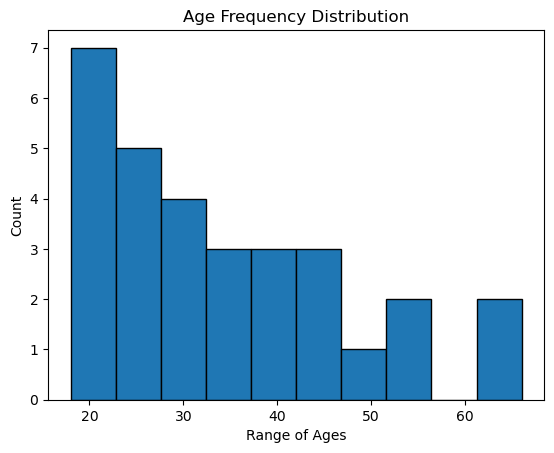

In [39]:
plt.hist(df_ages, edgecolor = "black", rwidth = 10)
plt.xlabel("Range of Ages")
plt.ylabel("Count")
plt.title("Age Frequency Distribution")
plt.show()

From the graph we can infer that the young people(18 - 25) prefer EV vehicles than the old people.

Q12. Create a probability distribution of the data and visualize it appropriately.

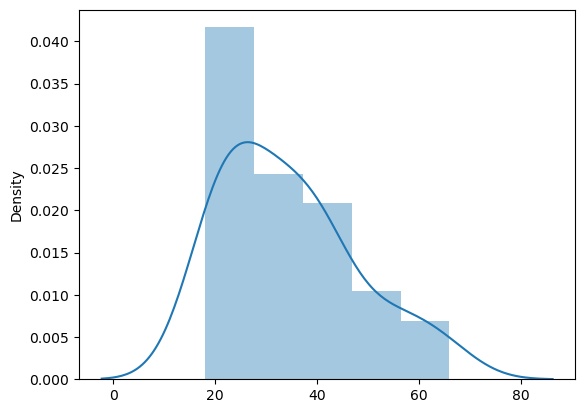

In [40]:
sns.distplot(df_ages)
plt.show()

Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

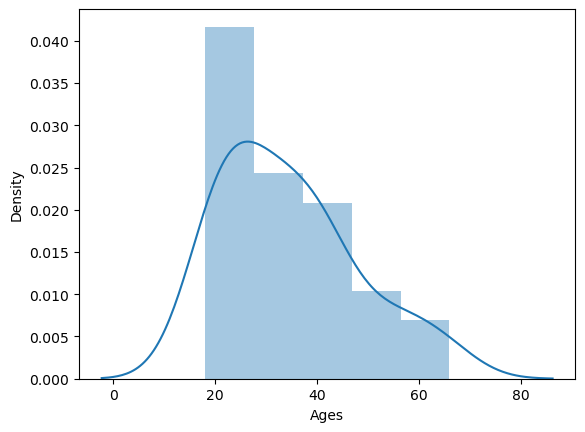

In [41]:
sns.distplot(df_ages["Ages"])
plt.show()

From the distplot we can infer that the distribution is positively skewed.

Sample mean 34.738
Population mean 34.46666666666667


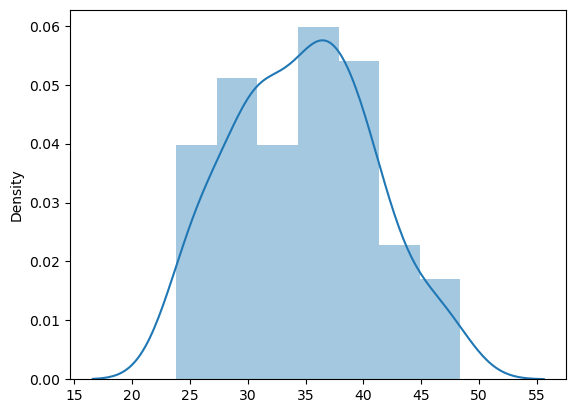

In [42]:
import random
no_of_samples=100
sampling_mean=[]
for i in range(no_of_samples):
    sample=random.choices(population=df_ages["Ages"],k = 5)
    sampling_mean.append(np.mean(sample))
print("Sample mean",np.mean(sampling_mean))
print("Population mean",np.mean(df_ages["Ages"]))
sns.distplot(sampling_mean)
plt.show()

Sample mean 34.79200000000001
Population mean 34.46666666666667


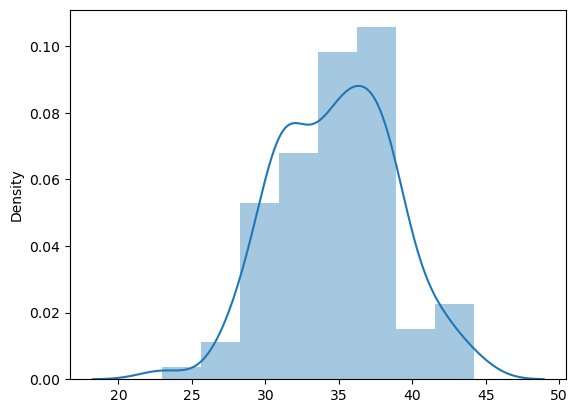

In [43]:
import random
no_of_samples=100
sampling_mean=[]
for i in range(no_of_samples):
    sample=random.choices(population=df_ages["Ages"],k = 10)
    sampling_mean.append(np.mean(sample))
print("Sample mean",np.mean(sampling_mean))
print("Population mean",np.mean(df_ages["Ages"]))
sns.distplot(sampling_mean)
plt.show()

Sample mean 34.784
Population mean 34.46666666666667


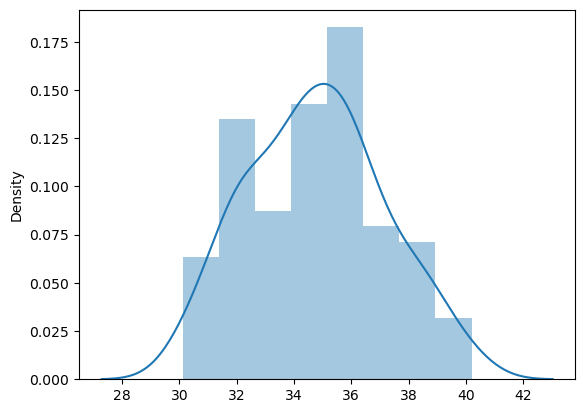

In [44]:
import random
no_of_samples=100
sampling_mean=[]
for i in range(no_of_samples):
    sample=random.choices(population=df_ages["Ages"],k = 25)
    sampling_mean.append(np.mean(sample))
print("Sample mean",np.mean(sampling_mean))
print("Population mean",np.mean(df_ages["Ages"]))
sns.distplot(sampling_mean)
plt.show()

From above graps we can infer that no matter the size of sample, the distribution is always normal and sampling_mean is very near to actual population mean. Hence the central limit therom will always holds true in this case.

Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [45]:
r = 6
n = 10
p = (len(df_ages["Ages"]) - len(sort_ages["Ages"]))/len(df_ages["Ages"])

In [46]:
stats.binom.pmf(r, n, p)

0.0006656716898846715

The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is near to 0%.

Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age.

In [47]:
r = 25
n = 300
p = 0.1

In [48]:
stats.binom.pmf(r, n, p)

0.0509860415314796

The probability that out of a random sample of 300 buyers exactly 25 are above 50 years of age is 5%.

Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.(State reasons as to why did you use a z or t distribution).

Population standard deviation is not given and hence we are using t test.

In [49]:
xbar = df_ages["Ages"].mean()
n = len(df_ages["Ages"])
samplesd = df_ages["Ages"].std()
alpha = 0.05
t_alpha_2 = stats.t.isf(alpha/2, df = n-1)
ll = xbar - (t_alpha_2 * (samplesd/np.sqrt(n)))
ul = xbar + (t_alpha_2 * (samplesd/np.sqrt(n)))
print(ll, ul)

29.493758755758076 39.43957457757526


The lower limit is 29.493758755758076 and upper limit is 39.43957457757526.

Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [50]:
alpha = 0.05
z = stats.norm.isf(alpha/2)
p0 = 0.20
margin_of_error = 0.02
n = ((z*(np.sqrt(p0 * (1-p0))))/margin_of_error)**2

In [51]:
print("Minimum sample size is :", round(n))

Minimum sample size is : 1537


Minimum sample size necessary to estimate the proportion of people who own an EV with a 95% confidence level and a margin of error of 2% is approximately 1537.

Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [52]:
alpha = 0.1
z = stats.norm.isf(alpha/2)
p0 = 0.20
margin_of_error = 0.05
n = ((z*(np.sqrt(p0 * (1-p0))))/margin_of_error)**2

In [53]:
print("Minimum sample size is :", round(n))

Minimum sample size is : 173


Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

Framing Hypothesis:

    H0 : Population that are owning EV is currently 20%.
    Ha : Population that are owning Ev is currently not 20%.

In [54]:
p0 = 0.2
alpha = 0.05
n = 30
phat = 5/30

In [55]:
tstat = (phat-p0)/((p0*(1-p0))/n)**0.5
tstat

-0.4564354645876386

In [56]:
pval = stats.t.sf(abs(tstat),df=n-1)*2
pval

0.6514770800454333

In [57]:
pval < alpha

False

Here since pvalue > alpha, we failed to reject the null hypothesis.

Population that are owning EV is currently 20%.

Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to testmileage. Zen claims that the new EVs get a mileage of 96 kmpl on the highway. Your results show a mean of 91.3 kmpl and a standard deviation of
14.4.


a. Show why you support Zen’s claim using the P-value obtained.


b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about
the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]


c. Write a summary of results and the action that Zen must take to remedy the complaints.


d. What is your position on performing the test for variability along with thetest for means?

20a. Show why you support Zen’s claim using the P-value obtained.

Framing hypothisis:

    H0: The new EVs got a mileage of equal to 96 kmpl on the highway(mu=96)

    Ha : The new EVs got a mileage of not equal to 96 kmpl on the highway(mu<>96)

In [58]:
n = 40
mu = 96
xbar = 91.3
samplesd = 14.4
alpha = 0.05

In [59]:
t_stats = (xbar - mu)/(samplesd/np.sqrt(n))
t_stats

-2.0642645837210267

In [60]:
pval = stats.t.cdf(t_stats, df = n-1) * 2
pval

0.04568930349115842

In [61]:
pval < alpha

True

Since the pvalue < alpha, we reject the null hypothesis.

The new EVs got a mileage of not equal to 96 kmpl on the highway.

20b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about
the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]

Framing hypothisis:

    H0 : The population standard deviation on the highway is 7.2(sigma = 7.2)

    Ha : The population standard deviation on the highway is 7.2(sigma != 7.2)

In [62]:
n = 40
sigma = 7.2
samplesd = 14.4
alpha = 0.05

In [63]:
# critical_value
chi_critical= stats.chi2.isf(alpha/2, df=n-1)
chi_critical

58.120059734686336

In [64]:
# chi-square statistic
chi_square_stats=((n-1)*(samplesd**2))/sigma**2
chi_square_stats

156.0

In [65]:
# p-value (right tailed test)
pval = (1-stats.chi2.cdf(chi_square_stats, df=n-1))*2
pval

1.3322676295501878e-15

In [66]:
chi_square_stats > chi_critical

True

In [67]:
pval < alpha

True

We reject H0 in this case. The population standard deviation on the highway is 7.2.

20c. Write a summary of results and the action that Zen must take to remedy the complaints.

* From the above tests it is clear that the Zen automotives claim of mileage failed so they have to imporve the mileages of vehicles by working on it or management of zen should verify it properly before they raising any claims. The standard deviation claim also failed so they have to be very sure before announcing these claims.

20d. What is your position on performing the test for variability along with thetest for means?

* conducting mean test will give exact mileage value.
* variabilty test is to check the spread of data in terms of mileage.

Q21. Write a report comparing and contrasting Descriptive vs Inferential Statistics in about 200-500 words and how each helps to get more insight into the data at hand.

**Introduction:**

Statistics plays a crucial role in extracting meaningful insights from data, aiding decision-making processes across various domains. Two fundamental branches of statistics, descriptive and inferential, serve distinct purposes in understanding and interpreting data. This report aims to compare and contrast descriptive and inferential statistics and elucidate how each contributes to gaining insights from the data at hand.

**Descriptive Statistics:**

Descriptive statistics involves the presentation and summarization of data in a meaningful manner. Measures such as mean, median, mode, range, and standard deviation fall under this category. The primary objective is to provide a concise summary that describes the essential features of a dataset. Descriptive statistics are valuable for simplifying complex data sets into manageable and interpretable forms, allowing researchers and analysts to identify patterns, trends, and central tendencies easily.

For example, calculating the mean and standard deviation of a set of test scores helps educators understand the average performance and the degree of variability among students. Histograms and box plots are graphical representations used in descriptive statistics to visualize the distribution of data.

**Inferential Statistics:**

Inferential statistics, on the other hand, involves making inferences or predictions about a population based on a sample of data. This branch extends beyond the immediate dataset and delves into broader implications and generalizations. Techniques like hypothesis testing, regression analysis, and confidence intervals are common tools in inferential statistics.


**How Each Provides Insight:**

*Descriptive Statistics:*

Provides a snapshot of the data, allowing for a quick understanding of central tendencies and variability.
Facilitates the identification of patterns and trends within the dataset.
Enhances data comprehension through visualizations like graphs and charts.

*Inferential Statistics:*

Enables predictions and generalizations about a larger population based on a representative sample.
Tests hypotheses and evaluates the significance of observed effects.
Helps in decision-making by providing a basis for making predictions or drawing conclusions beyond the immediate data.


**Conclusion:**

In conclusion, while descriptive statistics simplifies and organizes data to offer a snapshot of its characteristics, inferential statistics goes a step further, making predictions and drawing conclusions about a broader population. Together, these two branches provide a comprehensive toolkit for researchers and analysts to extract meaningful insights from data, guiding informed decision-making processes. The synergy between descriptive and inferential statistics is essential for a holistic understanding of the complexities within datasets.